# CW1 - Object Recognition using CNN
To apply machine learning alorithms to clasify the testing images into object categories. Then use a model to perform classification and report quantitative results.

Due: Monday 19th April

# Introduction

The aim is to evaluate the use of CNN's in image recognition and the affect of adding multiple layers.

# Imports 

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.feature
import tensorflow as tf

# Load Data
There are 100 different categories of objects
each has 500 images for training and 100 images for testing.
Split the data into train and test sections

In [22]:
images = np.load('trnImage.npy')
label_fine = np.load('trnLabel_fine.npy')
label_coarse = np.load('trnLabel_coarse.npy')

image_index = 1 # pick a specific image
image = images[:, :, :, image_index]

test_images = np.load('tstImage.npy')
test_label_fine = np.load('tstLabel_fine.npy')
test_label_coarse = np.load('tstLabel_coarse.npy')

print(f'Images Shape: {images.shape}')
print(f'Train Labels Fine Shape: {label_fine.shape}')
print(f'Train Labels Coarse Shape: {label_coarse.shape}')

Images Shape: (32, 32, 3, 50000)
Train Labels Fine Shape: (50000,)
Train Labels Coarse Shape: (50000,)


# Visualise data

In [23]:
# plt.scatter(images[:,0], images[:,1], color="r", marker="o")
# #plt.scatter(test_images[:,0], test_images[:,1], color="b", marker='v')

# # Add title and axis names
# plt.title('CIFAR-100 data using coarse')
# plt.xlabel('height')
# plt.ylabel('width')
# plt.show()

# CNN

## Expland the data to include a channel dimension for CNN. As images are greyscale add one additional axis in the last dimension of our data

In [24]:
print(images.shape)
images_reshaped = np.transpose(images, (3, 0, 1, 2))

print(images_reshaped.shape)
#images = np.expand_dims(images, axis=(4))
#print(images.shape)

(32, 32, 3, 50000)
(50000, 32, 32, 3)


In [25]:
print(test_images.shape)
test_images_reshaped = np.transpose(test_images, (3, 0, 1, 2))

(32, 32, 3, 10000)


### Normalise the data

In [35]:
images_normalised= np.divide(images_reshaped, 255)
test_images_normalised = np.divide(test_images_reshaped, 255)

label_fine_normalised = np.divide(label_fine, 255)
test_label_fine_normalised = np.divide(test_label_fine, 255)

In [33]:
print(label_fine_normalised)
print(images_normalised)

[0.0745098  0.11372549 0.         ... 0.01176471 0.02745098 0.28627451]
[[[[3.9215689e-03 3.9215689e-03 3.9215689e-03]
   [3.9215689e-03 3.9215689e-03 3.9215689e-03]
   [3.9215689e-03 3.9215689e-03 3.9215689e-03]
   ...
   [2.9988466e-03 3.1526336e-03 2.9680892e-03]
   [3.2602844e-03 3.4448290e-03 3.1372549e-03]
   [2.7989235e-03 2.9834679e-03 2.5682431e-03]]

  [[3.9215689e-03 3.9215689e-03 3.9215689e-03]
   [3.9061899e-03 3.9061899e-03 3.9061899e-03]
   [3.9061899e-03 3.9061899e-03 3.9061899e-03]
   ...
   [2.6143792e-03 2.7066513e-03 2.3068052e-03]
   [2.4759709e-03 2.5836218e-03 1.9992313e-03]
   [2.2452904e-03 2.3683200e-03 1.7377932e-03]]

  [[3.9215689e-03 3.9215689e-03 3.9215689e-03]
   [3.9061899e-03 3.9061899e-03 3.9061899e-03]
   [3.9215689e-03 3.9215689e-03 3.9215689e-03]
   ...
   [2.9065744e-03 3.0603614e-03 2.5990005e-03]
   [2.5528644e-03 2.7374087e-03 1.9992313e-03]
   [1.8608228e-03 2.0453674e-03 1.3379470e-03]]

  ...

  [[2.2760478e-03 2.8450596e-03 1.2149174e-03]
 

### Create and train a Tensorflow Convolutional Neural Network on the training set using Conv2D and pooling Layers

In [36]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10))

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(images_normalised, label_fine_normalised, epochs=10, 
                    validation_data=(test_images_normalised, test_label_fine_normalised))

Epoch 1/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.0418 - accuracy: 0.0108 - val_loss: 0.0000e+00 - val_accuracy: 0.0100
Epoch 2/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0000e+00 - accuracy: 0.0100 - val_loss: 0.0000e+00 - val_accuracy: 0.0100
Epoch 3/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0000e+00 - accuracy: 0.0099 - val_loss: 0.0000e+00 - val_accuracy: 0.0100
Epoch 4/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0000e+00 - accuracy: 0.0100 - val_loss: 0.0000e+00 - val_accuracy: 0.0100
Epoch 5/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0000e+00 - accuracy: 0.0102 - val_loss: 0.0000e+00 - val_accuracy: 0.0100
Epoch 6/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0000e+00 - accuracy: 0.0088 - val_loss: 0.0000e+00 - val_accuracy: 0.0100
Epoch 7/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0000e+0

### Plot models traing curves 

1563/1563 - 2s - loss: 0.0000e+00 - accuracy: 0.0100
0.009999999776482582


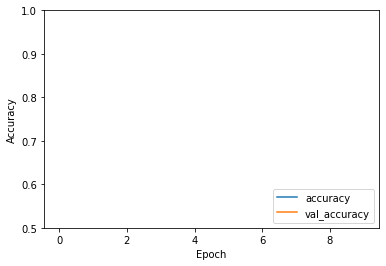

In [39]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(images_normalised,  label_fine_normalised, verbose=2)

print(test_acc)

In [41]:
score = model.evaluate(test_images_normalised, test_label_fine_normalised, verbose=0)
print(score)

[0.0, 0.009999999776482582]
